# Case Study - World Happiness Analysis Project

## Table of Content

1. Importing Libraries
2. Importing Data
3. Elbow Technique
4. K-mean Clustering
5. Grouping


# 01. Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Import the kmeans algorithm from scikit-learn
import pylab as pl #Pylab is a convenience module that bulk imports matplotlib

In [21]:
# This option ensures the charts created  are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# 02a. Importing Data - 2019 Data

In [22]:
# Path & list setup
path = r'/Users/ChuahLH/Desktop/Data Science/Data Immersion/Achievement 6/World Happiness Analysis'

In [23]:
# Import 2015.csv dataset into notebook using the os library and the vars_list
df_2019 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '2019_clean_data.csv'), index_col = False)

In [24]:
df_2019.head()

,Unnamed: 0,happiness_rank_2019,country,happiness_score_2019,economy_gdp_2019,social_support_2019,healthy_life_expectancy_2019,freedom_2019,generosity_2019,trust_2019
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [25]:
# Drop the redundant columns
df_2019 = df_2019.drop(['Unnamed: 0'],axis = 1)

In [26]:
df_2019.shape

(156, 9)

In [27]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   happiness_rank_2019           156 non-null    int64  
 1   country                       156 non-null    object 
 2   happiness_score_2019          156 non-null    float64
 3   economy_gdp_2019              156 non-null    float64
 4   social_support_2019           156 non-null    float64
 5   healthy_life_expectancy_2019  156 non-null    float64
 6   freedom_2019                  156 non-null    float64
 7   generosity_2019               156 non-null    float64
 8   trust_2019                    156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


### Note: Data Wrangling, Subsetting and Consistency Check had been previously carried out in Exercise 6.1

In [28]:
# There are mixed of categorical data and numerical data. Just keep the numerical data in this exercise.
df_2019_clean = df_2019.drop(columns =['country','happiness_rank_2019'])

In [29]:
df_2019_clean

,happiness_score_2019,economy_gdp_2019,social_support_2019,healthy_life_expectancy_2019,freedom_2019,generosity_2019,trust_2019
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


# 03a. Elbow Technique - 2019 Data

In [30]:
# Stating by defining the range of the cluster
num_cl = range(1, 10) 
# Then, defining the k-means cluster in the above range.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [31]:
# Now, create a score for each of the ranges created..
score_2019 = [kmeans[i].fit(df_2019_clean).score(df_2019_clean) for i in range(len(kmeans))] 

In [32]:
score_2019

[-245.58699341025644,
 -90.96037391184757,
 -55.32469112343368,
 -40.32867812610223,
 -29.874455852139036,
 -26.217914863896883,
 -24.337066242965367,
 -22.572197512645197,
 -20.88018024941678]

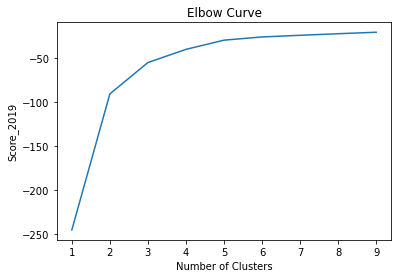

In [33]:
# And finally, create the elbow graph
pl.plot(num_cl,score_2019)
pl.xlabel('Number of Clusters')
pl.ylabel('Score_2019')
pl.title('Elbow Curve')
pl.show()

The elbow, or the breaking point of the curve, is where the curve begins to flatten out. In this case, we can see that it jumps rapidly from one to two then to three on the x-axis, then rises only slowly after three. That the optimal count for this clusters is just about three. Let's take three clusters in this case.  

# 04a. K-Means Clustering - 2019 Data

In [34]:
# Create the object based on the n° of clusters

kmeans = KMeans(n_clusters = 3) 

In [35]:
# Then fit the K-mean into the DF

kmeans.fit(df_2019_clean)

KMeans(n_clusters=3)

In [36]:
df_2019_clean['clusters'] = kmeans.fit_predict(df_2019_clean)

In [37]:
df_2019_clean.head()

,happiness_score_2019,economy_gdp_2019,social_support_2019,healthy_life_expectancy_2019,freedom_2019,generosity_2019,trust_2019,clusters
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410,1
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341,1
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298,1


In [38]:
df_2019_clean['clusters'].value_counts()

2    67
0    59
1    30
Name: clusters, dtype: int64

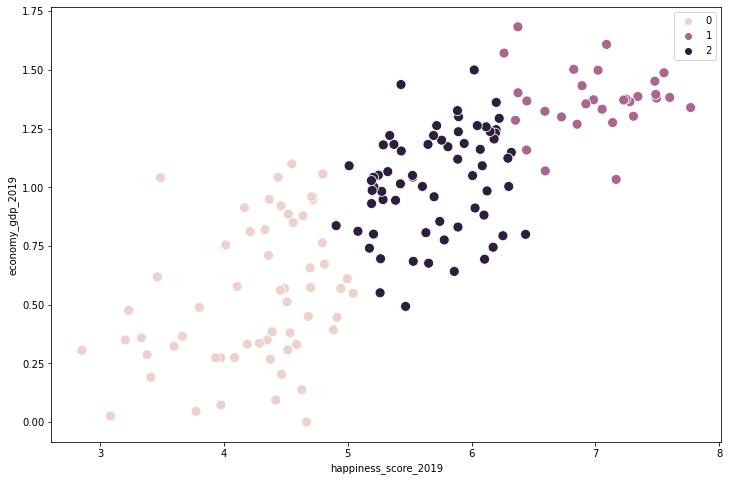

In [39]:
# Plot the clusters for the "happiness_score" and "economy_gdp" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2019_clean['happiness_score_2019'], y=df_2019_clean['economy_gdp_2019'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2019') # Label x-axis.
plt.ylabel('economy_gdp_2019') # Label y-axis.
plt.show()

The first cluster (1) has the highest economy_gdp and highest happiness score; the second cluster (0) has the lowest economy gdp and lowest happiness score. The third cluster (2) major sat in the middle economy gdp and the happiness score is in middle too. 

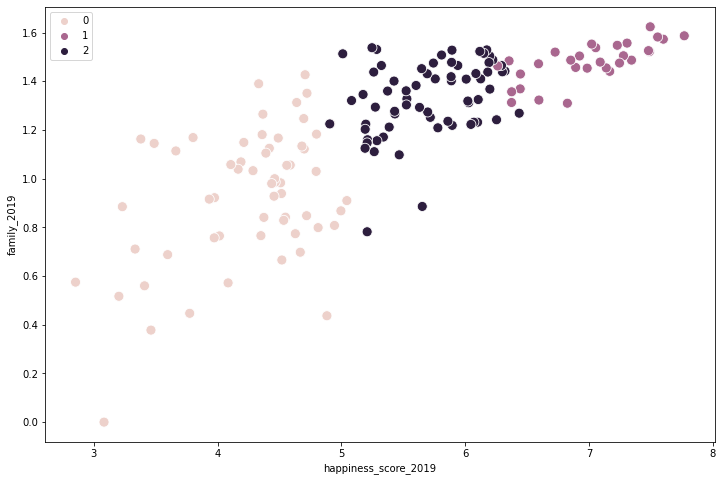

In [40]:
# Plot the clusters for the "happiness_score" and "social_support_2019" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2019_clean['happiness_score_2019'], y=df_2019_clean['social_support_2019'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2019') # Label x-axis.
plt.ylabel('family_2019') # Label y-axis.
plt.show()

The first cluster (1) has the highest social support score and the highest happiness score; the second cluster (0) has the lowest social support score and lowest happiness score. The third cluster (2) major sat in the middle social support score and the happiness score is in middle too. 

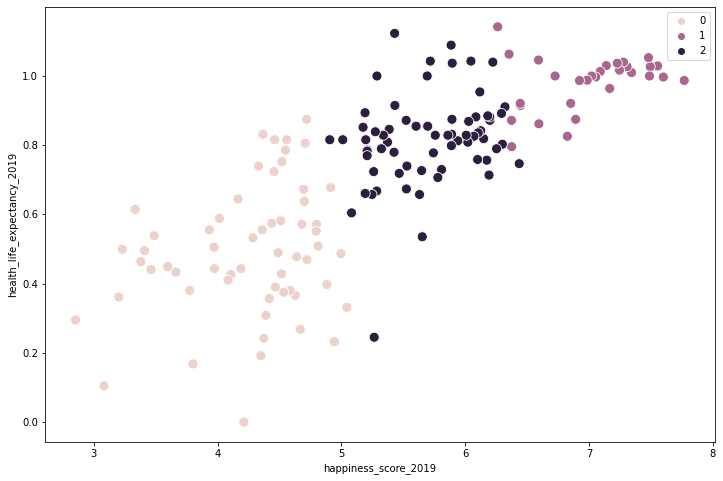

In [41]:
# Plot the clusters for the "happiness_score" and "health_life_expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2019_clean['happiness_score_2019'], y=df_2019_clean['healthy_life_expectancy_2019'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2019') # Label x-axis.
plt.ylabel('health_life_expectancy_2019') # Label y-axis.
plt.show()

The first cluster (1) has the highest health life expectancy score and highest happiness score; the second cluster (0) has the lowest health life expectancy score and lowest happiness score. The third cluster (2) major sat in the middle health life expectancy score and the happiness score is in middle too.

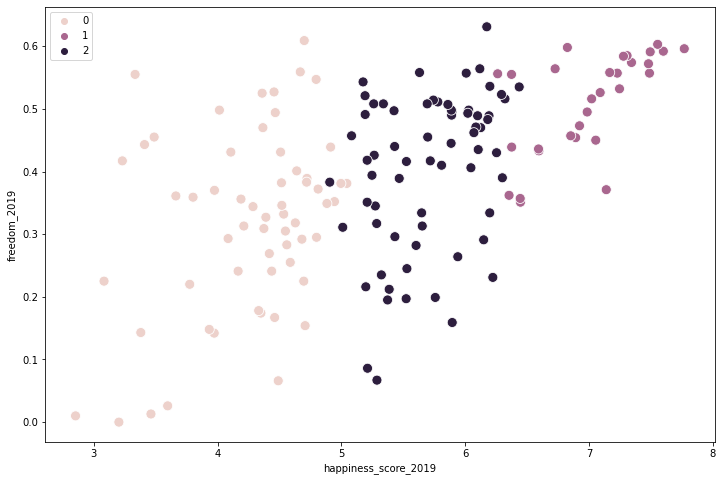

In [42]:
# Plot the clusters for the "happiness_score" and "freedom" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2019_clean['happiness_score_2019'], y=df_2019_clean['freedom_2019'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2019') # Label x-axis.
plt.ylabel('freedom_2019') # Label y-axis.
plt.show()

The first cluster (1) has the highest freedom score and highest happiness score; the second cluster (0) has the lowest freedom score and lowest happiness score. The third cluster (2) major sat in the middle freedom score and the happiness score is in middle too.

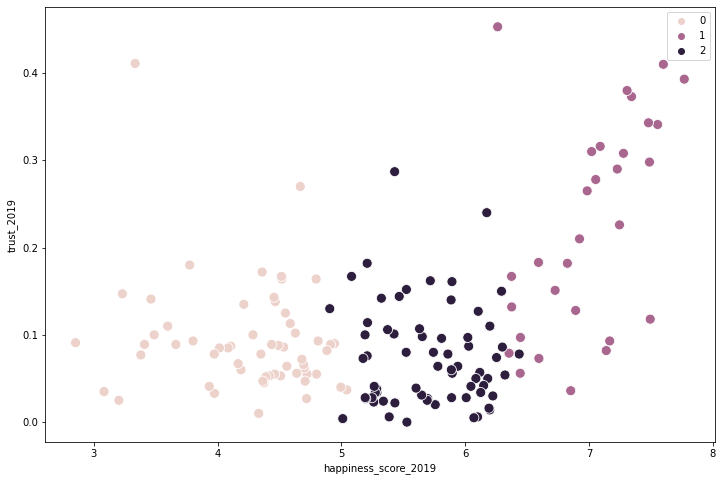

In [43]:
# Plot the clusters for the "happiness_score" and "trust" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2019_clean['happiness_score_2019'], y=df_2019_clean['trust_2019'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2019') # Label x-axis.
plt.ylabel('trust_2019') # Label y-axis.
plt.show()

The first cluster (1) has the highest trust score and highest happiness score; the second cluster (0) has the lowest trust score and lowest happiness score. The third cluster (2) major sat in the middle trust score and the happiness score is in middle too.

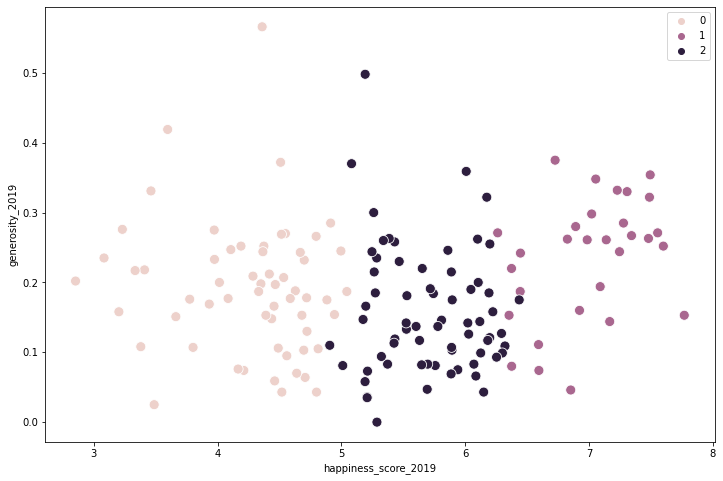

In [44]:
# Plot the clusters for the "happiness_score" and "generosity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2019_clean['happiness_score_2019'], y=df_2019_clean['generosity_2019'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2019') # Label x-axis.
plt.ylabel('generosity_2019') # Label y-axis.
plt.show()

The first cluster (0) has the lowest generosity score and lowest happiness score; the second cluster (1) has the highest generosity score and highest happiness score. The third cluster (2) major sat in the middle generosity score and the happiness score is in middle too.

# # 05a. Grouping - 2016 Data

In [47]:
df_2019_clean.loc[df_2019_clean['clusters'] == 2, 'cluster'] = 'purple'
df_2019_clean.loc[df_2019_clean['clusters'] == 1, 'cluster'] = 'whitish purple'
df_2019_clean.loc[df_2019_clean['clusters'] == 0, 'cluster'] = 'whitish pink'

In [49]:
df_2019_clean.groupby('clusters').agg({'happiness_score_2019':['mean', 'median'],
                                       'economy_gdp_2019':['mean', 'median'],
                                       'social_support_2019':['mean', 'median'], 
                         'healthy_life_expectancy_2019':['mean', 'median'], 
                         'freedom_2019':['mean', 'median'],
                    'trust_2019':['mean', 'median'],
                    'generosity_2019':['mean', 'median']})

happiness_score_2019         economy_gdp_2019          \
                         mean  median             mean  median   
clusters                                                         
0                    4.258322  4.4180         0.531695  0.4890   
1                    6.996767  7.0375         1.369767  1.3725   
2                    5.706910  5.7180         1.025970  1.0440   

         social_support_2019         healthy_life_expectancy_2019         \
                        mean  median                         mean median   
clusters                                                                   
0                   0.930695  0.9800                     0.491678  0.486   
1                   1.479833  1.4855                     0.980400  0.999   
2                   1.332373  1.3460                     0.816672  0.818   

         freedom_2019         trust_2019        generosity_2019         
                 mean  median       mean median            mean median  
clusters                                                                
0            0.320169  0.3440   0.093356  0.085        0.191136  0.187  
1            0.509800  0.5435   0.225700  0.218        0.234667  0.261  
2            0.403836  0.4350   0.074254  0.060        0.157000  0.137

The cluster 1 has the best stats in almost all categories. The median number of happiness score for this cluster is 7, which is significantly larger than the other two. 